<a href="https://colab.research.google.com/github/IagoMagalhaes23/atlantico_bootcamp/blob/main/Squad_3_Trilha_Intermediaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação de bibliotecas

In [ ]:
import os
import glob
import zipfile
import cv2 as cv
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#Carregando dataset

In [ ]:
endereco = '/content/drive/MyDrive/dataset.zip'

zip_object = zipfile.ZipFile(file=endereco, mode='r')
zip_object.extractall('./') 
zip_object.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/drive/MyDrive/dataset.zip' mode='r'>>

#Funcionalidades para leitura de arquivos

In [ ]:
def readDir(diretorio):
    """
        Função para listagem de imagens
        :param diretorio: enedereço do diretório
    """
    listaimgs = os.listdir(diretorio)
    return listaimgs

def readImage(local, listaimgs):
    """
        Função para leitura de imagens
        :param local: pasta das imagens
        :param listaimgs: nomes das imagens
    """
    imagens = []
    for i in listaimgs:
        imagens.append(cv.cvtColor(cv.imread(local+i), cv.COLOR_BGR2GRAY))
    
    return imagens

#Funcionalidades para exibição de imagens

In [ ]:
def mostrar_imagemRGB(imagem):
  imagem_rgb = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
  plt.imshow(imagem_rgb)

def mostrar_imagemGRAY(imagem):
  imagem_gray = cv.cvtColor(imagem, cv.COLOR_BGR2GRAY)
  plt.imshow(imagem_gray)

#Funcionalidade da Matriz de Confusão

In [ ]:
def get_confusion_matrix(y_true, y_pred, model):
    plt.subplots(figsize=(8,6))
    labels = ['Normal','Covid','default']
    cm = metrics.confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='YlGnBu').set(title=model, ylabel='Real', xlabel='Predito', 
                                                            yticklabels=labels,
                                                            xticklabels=labels)

#Lendo dataset

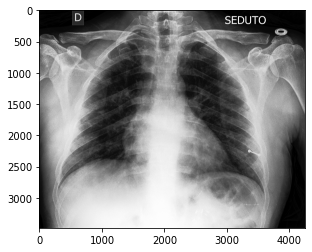

In [ ]:
dataset = 'dataset/imagens/'

imagens = readDir(dataset)
img = readImage(dataset, imagens)

mostrar_imagemRGB(img[0])

In [ ]:
def carrega_data(listaimgs, imagens):
  i = 0
  amostras = []
  classe = []
  for img in listaimgs:
    amostras.append(imagens[i])
    clas = img.split('_')
    classe.append(clas[1][0])
    i = i + 1
  return amostras, classe

In [ ]:
amostras, classe = carrega_data(imagens, img)

#Metodologia 1

- Teste 1
1.   Conversão da imagem para tons de cinza
2.   Redimensionamento da imagem para 196 por 196
3.   Aplicação do filtro gausiano

- Teste 2
1.   Conversão da imagem para tons de cinza
2.   Redimensionamento da imagem para 196 por 196
3.   Aplicação do filtro gausiano
4.   Extração de caracteristicas com PCA

- Teste 3
1.   Converte a imagem para tons de cinza
2.   Redimensiona a imagem para 196 por 196
3.   Recorta a imagem, objetivando remover o diafragma
4.   Aplicar a equalização de histograma
5.   Aplica o filtro de gaussiano
6.   Aplicando Thershold adaptativo 

- Teste 4
1.   Converte a imagem para tons de cinza
2.   Redimensiona a imagem para 196 por 196
3.   Recorta a imagem, objetivando remover o diafragma
4.   Aplicar a equalização de histograma
5.   Aplica o filtro de gaussiano
6.   Aplicando Thershold adaptativo 
7.   Extração de caracteristicas com PCA

- Algoritmos testados
1.   KNN
2.   MLP
3.   SVM
4.   Naive Bayes

##Teste 1

In [ ]:
def pipeline(imagem):
    imagem = cv.resize(imagem, (196, 196))
    imagem = cv.GaussianBlur(imagem, (5,5), 0)
    return imagem

def features_extraction(images):
    features_list = []
    for image in images:
        img = pipeline(image)
        img = img.flatten()
        features_list.append(img.astype(int))
    norm =  MaxAbsScaler()
    norm.fit(features_list)
    norm_features = norm.transform(features_list)
    return norm_features

0


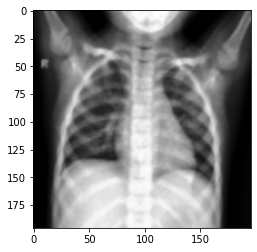

In [ ]:
mostrar_imagemRGB(pipeline(amostras[20]))
print(classe[20])

1


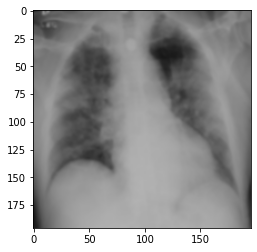

In [ ]:
mostrar_imagemRGB(pipeline(amostras[21]))
print(classe[21])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neig

Tempo de treinamento: 1.2762994766235352
Acurácia KNN: 0.9371069182389937
Recall KNN: [0.8852459  0.96938776]
Precisão KNN: [0.94736842 0.93137255]
Tempo de treinamento: 422.85381841659546
Acurácia MLP: 0.6163522012578616
Recall MLP: [0. 1.]
Precisão MLP: [0.        0.6163522]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tempo de treinamento: 0.07793927192687988
Acurácia SVM: 0.9308176100628931
Recall SVM: [0.95081967 0.91836735]
Precisão SVM: [0.87878788 0.96774194]
Tempo de treinamento: 0.034203290939331055
Acurácia NB: 0.9685534591194969
Recall NB: [0.98360656 0.95918367]
Precisão NB: [0.9375     0.98947368]


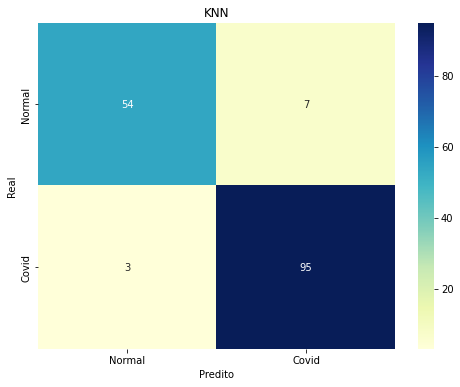

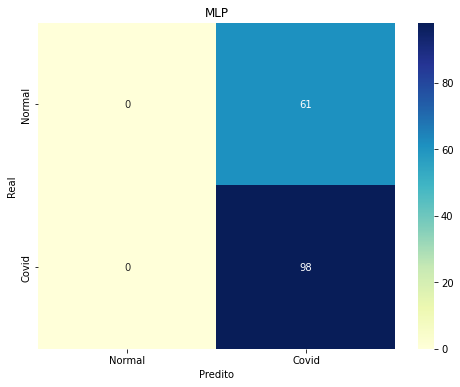

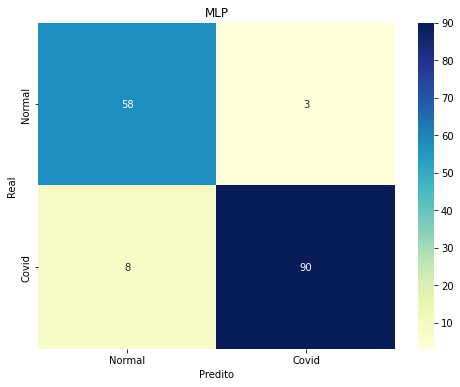

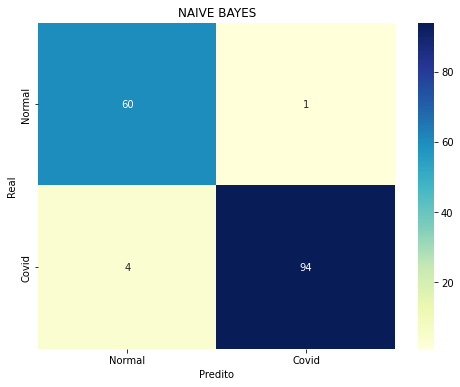

In [ ]:
features = features_extraction(amostras)

X_train, X_test, y_train, y_test = train_test_split(features, classe, train_size=0.3, random_state=42)

parametrosKNN = {
    "n_neighbors": [2, 3, 5, 7, 9, 11, 13, 15],
    "metric": ["euclidean", "manhattam"]
}

func_possiveis = ['tanh', 'logistic']
neur_possiveis =[
                    (10),(20),(30),(40),(50),(60),(70),(80),(90),(100),(200),(300),(400),(500)
                ]
parametrosMLP = {
    "hidden_layer_sizes":  neur_possiveis,
    "activation": func_possiveis
}

knn = GridSearchCV(KNeighborsClassifier(), parametrosKNN)
ini = time.time()
knn.fit(X_train, y_train)
fim = time.time()
result = knn.predict(X_test)
get_confusion_matrix(y_test, result, 'KNN')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia KNN: {knn.score(X=X_test, y=y_test)}")
print(f"Recall KNN: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão KNN: {metrics.precision_score(y_test,result,average=None)}")

mlp = GridSearchCV(MLPClassifier(max_iter=100, early_stopping=True), parametrosMLP)
ini = time.time()
mlp.fit(X_train, y_train)
fim = time.time()
result = mlp.predict(X_test)
get_confusion_matrix(y_test, result, 'MLP')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia MLP: {mlp.score(X=X_test, y=y_test)}")
print(f"Recall MLP: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão MLP: {metrics.precision_score(y_test,result,average=None)}")

svm = SVC(gamma=0.001)
ini = time.time()
svm.fit(X_train, y_train)
fim = time.time()
result = svm.predict(X_test)
get_confusion_matrix(y_test, result, 'MLP')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia SVM: {svm.score(X=X_test, y=y_test)}")
print(f"Recall SVM: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão SVM: {metrics.precision_score(y_test,result,average=None)}")

nb = GaussianNB()
ini = time.time()
nb.fit(X_train, y_train)
fim = time.time()
result = nb.predict(X_test)
get_confusion_matrix(y_test, result, 'NAIVE BAYES')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia NB: {nb.score(X=X_test, y=y_test)}")
print(f"Recall NB: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão NB: {metrics.precision_score(y_test,result,average=None)}")

##Teste 2

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neig

Tempo de treinamento: 0.16123270988464355
Acurácia KNN: 0.9433962264150944
Recall KNN: [0.90163934 0.96938776]
Precisão KNN: [0.94827586 0.94059406]
Tempo de treinamento: 3.916724920272827
Acurácia MLP: 0.9245283018867925
Recall MLP: [0.96721311 0.89795918]
Precisão MLP: [0.85507246 0.97777778]
Tempo de treinamento: 0.001462697982788086
Acurácia SVM: 0.9308176100628931
Recall SVM: [0.95081967 0.91836735]
Precisão SVM: [0.87878788 0.96774194]
Tempo de treinamento: 0.0010192394256591797
Acurácia NB: 0.9182389937106918
Recall NB: [0.83606557 0.96938776]
Precisão NB: [0.94444444 0.9047619 ]


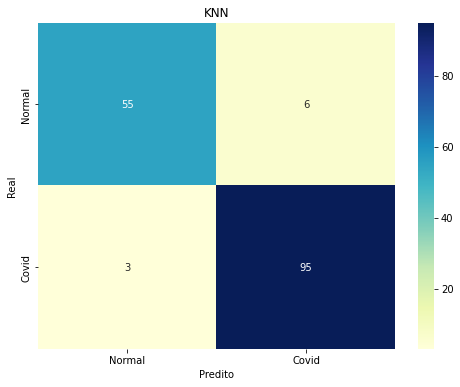

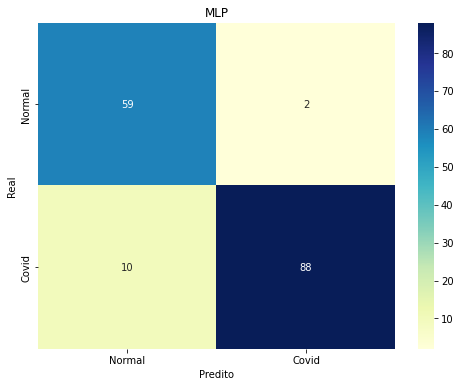

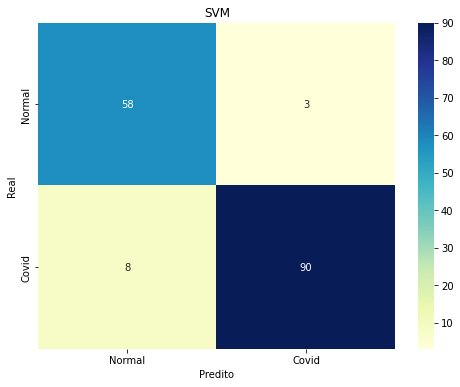

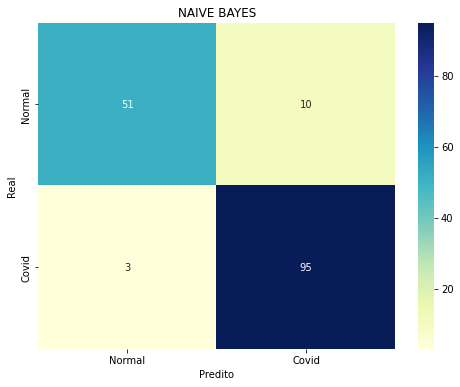

In [ ]:
pca = PCA(n_components=30)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

parametrosKNN = {
    "n_neighbors": [2, 3, 5, 7, 9, 11, 13, 15],
    "metric": ["euclidean", "manhattam"]
}

func_possiveis = ['tanh', 'logistic']
neur_possiveis =[
                    (10),(20),(30),(40),(50),(60),(70),(80),(90),(100),(200),(300),(400),(500)
                ]
parametrosMLP = {
    "hidden_layer_sizes":  neur_possiveis,
    "activation": func_possiveis
}

knn = GridSearchCV(KNeighborsClassifier(), parametrosKNN)
ini = time.time()
knn.fit(X_train, y_train)
fim = time.time()
result = knn.predict(X_test)
get_confusion_matrix(y_test, result, 'KNN')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia KNN: {knn.score(X=X_test, y=y_test)}")
print(f"Recall KNN: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão KNN: {metrics.precision_score(y_test,result,average=None)}")

mlp = GridSearchCV(MLPClassifier(max_iter=100, early_stopping=True), parametrosMLP)
ini = time.time()
mlp.fit(X_train, y_train)
fim = time.time()
result = mlp.predict(X_test)
get_confusion_matrix(y_test, result, 'MLP')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia MLP: {mlp.score(X=X_test, y=y_test)}")
print(f"Recall MLP: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão MLP: {metrics.precision_score(y_test,result,average=None)}")

svm = SVC(gamma=0.001)
ini = time.time()
svm.fit(X_train, y_train)
fim = time.time()
result = svm.predict(X_test)
get_confusion_matrix(y_test, result, 'SVM')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia SVM: {svm.score(X=X_test, y=y_test)}")
print(f"Recall SVM: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão SVM: {metrics.precision_score(y_test,result,average=None)}")

nb = GaussianNB()
ini = time.time()
nb.fit(X_train, y_train)
fim = time.time()
result = nb.predict(X_test)
get_confusion_matrix(y_test, result, 'NAIVE BAYES')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia NB: {nb.score(X=X_test, y=y_test)}")
print(f"Recall NB: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão NB: {metrics.precision_score(y_test,result,average=None)}")

##Teste 3

In [ ]:
amostras, classe = carrega_data(imagens, img)

def pipeline(imagem):
    imagem = cv.resize(imagem, (196, 196))
    imagem = imagem[0:170, :]
    imagem = cv.equalizeHist(imagem)
    imagem = cv.GaussianBlur(imagem, (5,5), 0)
    thresh1 = cv.adaptiveThreshold(imagem, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 199, 5)
    thresh2 = cv.adaptiveThreshold(imagem, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 199, 5)
    return thresh2

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neig

Tempo de treinamento: 1.0649981498718262
Acurácia KNN: 0.8176100628930818
Recall KNN: [0.81967213 0.81632653]
Precisão KNN: [0.73529412 0.87912088]
Tempo de treinamento: 425.5087888240814
Acurácia MLP: 0.3836477987421384
Recall MLP: [1. 0.]
Precisão MLP: [0.3836478 0.       ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tempo de treinamento: 0.06405448913574219
Acurácia SVM: 0.6289308176100629
Recall SVM: [0.03278689 1.        ]
Precisão SVM: [1.         0.62420382]
Tempo de treinamento: 0.029470205307006836
Acurácia NB: 0.7421383647798742
Recall NB: [0.36065574 0.97959184]
Precisão NB: [0.91666667 0.71111111]


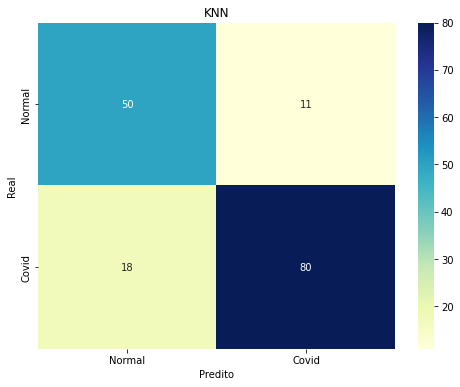

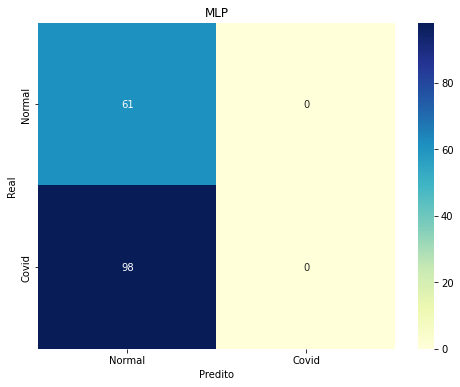

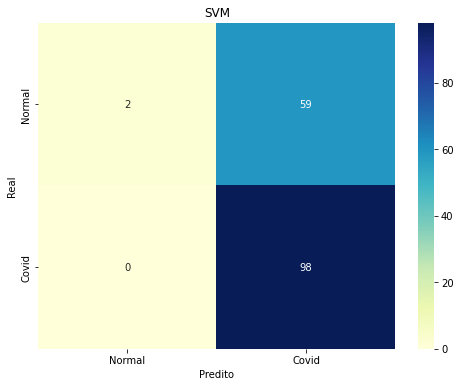

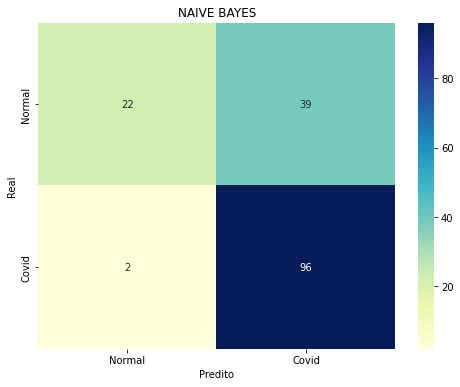

In [ ]:
def features_extraction(images):
    features_list = []
    for image in images:
        img = pipeline(image)
        img = img.flatten()
        features_list.append(img.astype(int))
    norm =  MaxAbsScaler()
    norm.fit(features_list)
    norm_features = norm.transform(features_list)
    return norm_features

features = features_extraction(amostras)

X_train, X_test, y_train, y_test = train_test_split(features, classe, train_size=0.3, random_state=42)

parametrosKNN = {
    "n_neighbors": [2, 3, 5, 7, 9, 11, 13, 15],
    "metric": ["euclidean", "manhattam"]
}

func_possiveis = ['tanh', 'logistic']
neur_possiveis =[
                    (10),(20),(30),(40),(50),(60),(70),(80),(90),(100),(200),(300),(400),(500)
                ]
parametrosMLP = {
    "hidden_layer_sizes":  neur_possiveis,
    "activation": func_possiveis
}

knn = GridSearchCV(KNeighborsClassifier(), parametrosKNN)
ini = time.time()
knn.fit(X_train, y_train)
fim = time.time()
result = knn.predict(X_test)
get_confusion_matrix(y_test, result, 'KNN')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia KNN: {knn.score(X=X_test, y=y_test)}")
print(f"Recall KNN: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão KNN: {metrics.precision_score(y_test,result,average=None)}")

mlp = GridSearchCV(MLPClassifier(max_iter=100, early_stopping=True), parametrosMLP)
ini = time.time()
mlp.fit(X_train, y_train)
fim = time.time()
result = mlp.predict(X_test)
get_confusion_matrix(y_test, result, 'MLP')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia MLP: {mlp.score(X=X_test, y=y_test)}")
print(f"Recall MLP: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão MLP: {metrics.precision_score(y_test,result,average=None)}")

svm = SVC(gamma=0.001)
ini = time.time()
svm.fit(X_train, y_train)
fim = time.time()
result = svm.predict(X_test)
get_confusion_matrix(y_test, result, 'SVM')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia SVM: {svm.score(X=X_test, y=y_test)}")
print(f"Recall SVM: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão SVM: {metrics.precision_score(y_test,result,average=None)}")

nb = GaussianNB()
ini = time.time()
nb.fit(X_train, y_train)
fim = time.time()
result = nb.predict(X_test)
get_confusion_matrix(y_test, result, 'NAIVE BAYES')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia NB: {nb.score(X=X_test, y=y_test)}")
print(f"Recall NB: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão NB: {metrics.precision_score(y_test,result,average=None)}")

0


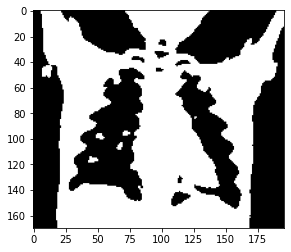

In [ ]:
mostrar_imagemRGB(pipeline(amostras[20]))
print(classe[20])

1


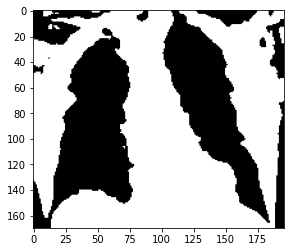

In [ ]:
mostrar_imagemRGB(pipeline(amostras[21]))
print(classe[21])

##Teste 4

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neig

Tempo de treinamento: 0.15230679512023926
Acurácia KNN: 0.9056603773584906
Recall KNN: [0.93442623 0.8877551 ]
Precisão KNN: [0.83823529 0.95604396]
Tempo de treinamento: 3.752366781234741
Acurácia MLP: 0.8742138364779874
Recall MLP: [0.96721311 0.81632653]
Precisão MLP: [0.76623377 0.97560976]
Tempo de treinamento: 0.0014302730560302734
Acurácia SVM: 0.9559748427672956
Recall SVM: [0.95081967 0.95918367]
Precisão SVM: [0.93548387 0.96907216]
Tempo de treinamento: 0.0010044574737548828
Acurácia NB: 0.9119496855345912
Recall NB: [0.90163934 0.91836735]
Precisão NB: [0.87301587 0.9375    ]


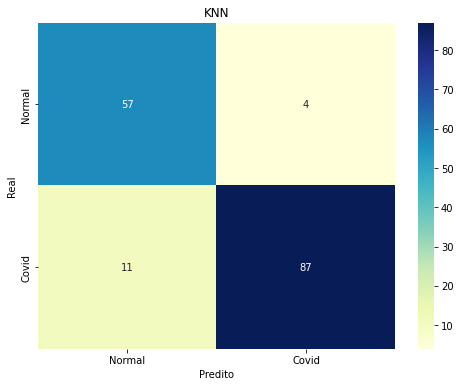

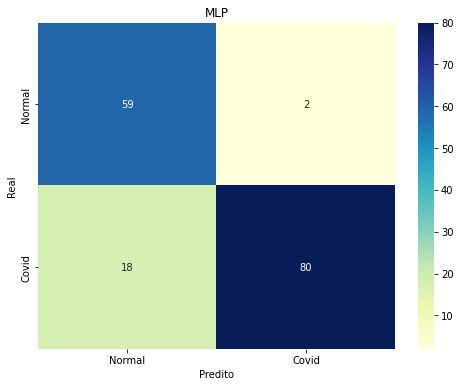

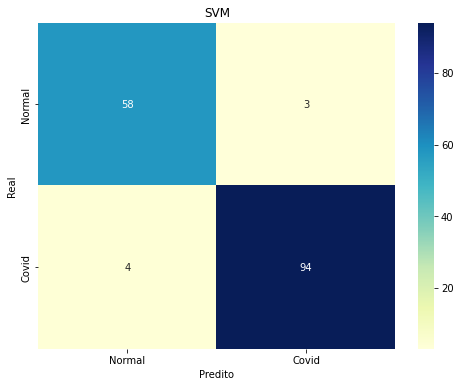

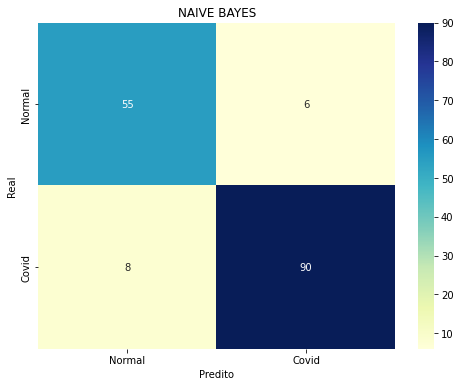

In [ ]:
amostras, classe = carrega_data(imagens, img)

def pipeline(imagem):
    imagem = cv.resize(imagem, (196, 196))
    imagem = imagem[0:170, :]
    imagem = cv.equalizeHist(imagem)
    imagem = cv.GaussianBlur(imagem, (5,5), 0)
    thresh1 = cv.adaptiveThreshold(imagem, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 199, 5)
    thresh2 = cv.adaptiveThreshold(imagem, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 199, 5)
    return imagem
  
def features_extraction(images):
    features_list = []
    for image in images:
        img = pipeline(image)
        img = img.flatten()
        features_list.append(img.astype(int))
    norm =  MaxAbsScaler()
    norm.fit(features_list)
    norm_features = norm.transform(features_list)
    return norm_features

features = features_extraction(amostras)

X_train, X_test, y_train, y_test = train_test_split(features, classe, train_size=0.3, random_state=42)

pca = PCA(n_components=30)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

parametrosKNN = {
    "n_neighbors": [2, 3, 5, 7, 9, 11, 13, 15],
    "metric": ["euclidean", "manhattam"]
}

func_possiveis = ['tanh', 'logistic']
neur_possiveis =[
                    (10),(20),(30),(40),(50),(60),(70),(80),(90),(100),(200),(300),(400),(500)
                ]
parametrosMLP = {
    "hidden_layer_sizes":  neur_possiveis,
    "activation": func_possiveis
}

knn = GridSearchCV(KNeighborsClassifier(), parametrosKNN)
ini = time.time()
knn.fit(X_train, y_train)
fim = time.time()
result = knn.predict(X_test)
get_confusion_matrix(y_test, result, 'KNN')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia KNN: {knn.score(X=X_test, y=y_test)}")
print(f"Recall KNN: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão KNN: {metrics.precision_score(y_test,result,average=None)}")

mlp = GridSearchCV(MLPClassifier(max_iter=100, early_stopping=True), parametrosMLP)
ini = time.time()
mlp.fit(X_train, y_train)
fim = time.time()
result = mlp.predict(X_test)
get_confusion_matrix(y_test, result, 'MLP')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia MLP: {mlp.score(X=X_test, y=y_test)}")
print(f"Recall MLP: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão MLP: {metrics.precision_score(y_test,result,average=None)}")

svm = SVC(gamma=0.001)
ini = time.time()
svm.fit(X_train, y_train)
fim = time.time()
result = svm.predict(X_test)
get_confusion_matrix(y_test, result, 'SVM')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia SVM: {svm.score(X=X_test, y=y_test)}")
print(f"Recall SVM: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão SVM: {metrics.precision_score(y_test,result,average=None)}")

nb = GaussianNB()
ini = time.time()
nb.fit(X_train, y_train)
fim = time.time()
result = nb.predict(X_test)
get_confusion_matrix(y_test, result, 'NAIVE BAYES')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia NB: {nb.score(X=X_test, y=y_test)}")
print(f"Recall NB: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão NB: {metrics.precision_score(y_test,result,average=None)}")

#Metodologia 2

- Teste 1
1.   Conversão da imagem para tons de cinza
2.   Redimensionamento da imagem para 196 por 196
3.   Aplicação do filtro gausiano
4.   Extração de caracteristicas com LBP

- Teste 2
1.   Converte a imagem para tons de cinza
2.   Redimensiona a imagem para 196 por 196
3.   Aplicar a equalização de histograma
4.   Aplica o filtro de gaussiano
5.   Aplicando Thershold adaptativo 
6.   Extração de caracteristicas com LBP

- Algoritmos testados
1.   KNN
2.   MLP
3.   SVM
4.   Naive Bayes

##Teste 1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neig

Tempo de treinamento: 1.186582326889038
Acurácia KNN: 0.8930817610062893
Recall KNN: [0.90163934 0.8877551 ]
Precisão KNN: [0.83333333 0.93548387]
Tempo de treinamento: 381.84496784210205
Acurácia MLP: 0.6163522012578616
Recall MLP: [0. 1.]
Precisão MLP: [0.        0.6163522]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tempo de treinamento: 0.07425761222839355
Acurácia SVM: 0.6289308176100629
Recall SVM: [0.03278689 1.        ]
Precisão SVM: [1.         0.62420382]
Tempo de treinamento: 0.03444981575012207
Acurácia NB: 0.8742138364779874
Recall NB: [0.90163934 0.85714286]
Precisão NB: [0.79710145 0.93333333]


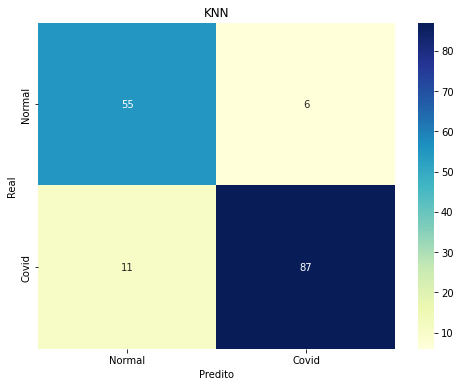

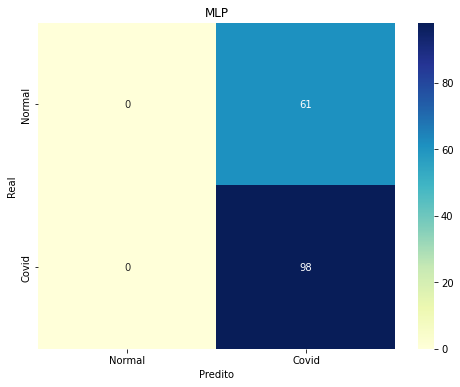

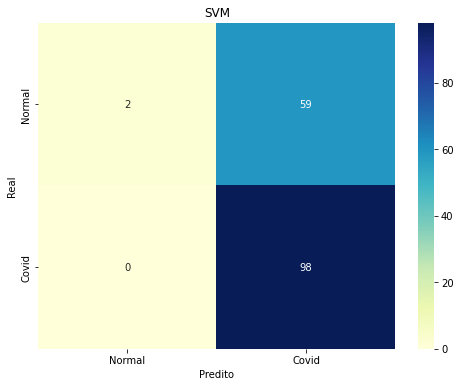

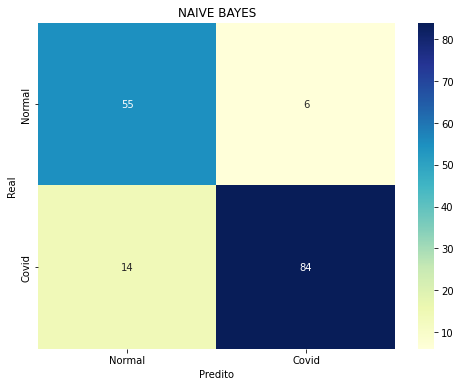

In [ ]:
amostras, classe = carrega_data(imagens, img)

def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y-1))
    val_ar.append(get_pixel(img, center, x-1, y))
    val_ar.append(get_pixel(img, center, x-1, y + 1))
    val_ar.append(get_pixel(img, center, x, y + 1))
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
    val_ar.append(get_pixel(img, center, x + 1, y))
    val_ar.append(get_pixel(img, center, x + 1, y-1))
    val_ar.append(get_pixel(img, center, x, y-1))
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val

def pipeline(imagem):
    imagem = cv.resize(imagem, (196, 196))
    imagem = cv.GaussianBlur(imagem, (5,5), 0)
    return imagem
  
def features_extraction(images):
    features_list = []
    for image in images:
        img = pipeline(image)
        img_lbp = np.zeros((len(img[0]), len(img)), np.uint8)
        for i in range(0, len(img[0])):
            for j in range(0, len(img)):
                img_lbp[i, j] = lbp_calculated_pixel(img, i, j)
        img = img_lbp.flatten()
        features_list.append(img.astype(int))
    norm =  MaxAbsScaler()
    norm.fit(features_list)
    norm_features = norm.transform(features_list)
    return norm_features

features = features_extraction(amostras)

X_train, X_test, y_train, y_test = train_test_split(features, classe, train_size=0.3, random_state=42)

parametrosKNN = {
    "n_neighbors": [2, 3, 5, 7, 9, 11, 13, 15],
    "metric": ["euclidean", "manhattam"]
}

func_possiveis = ['tanh', 'logistic']
neur_possiveis =[
                    (10),(20),(30),(40),(50),(60),(70),(80),(90),(100),(200),(300),(400),(500)
                ]
parametrosMLP = {
    "hidden_layer_sizes":  neur_possiveis,
    "activation": func_possiveis
}

knn = GridSearchCV(KNeighborsClassifier(), parametrosKNN)
ini = time.time()
knn.fit(X_train, y_train)
fim = time.time()
result = knn.predict(X_test)
get_confusion_matrix(y_test, result, 'KNN')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia KNN: {knn.score(X=X_test, y=y_test)}")
print(f"Recall KNN: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão KNN: {metrics.precision_score(y_test,result,average=None)}")

mlp = GridSearchCV(MLPClassifier(max_iter=100, early_stopping=True), parametrosMLP)
ini = time.time()
mlp.fit(X_train, y_train)
fim = time.time()
result = mlp.predict(X_test)
get_confusion_matrix(y_test, result, 'MLP')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia MLP: {mlp.score(X=X_test, y=y_test)}")
print(f"Recall MLP: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão MLP: {metrics.precision_score(y_test,result,average=None)}")

svm = SVC(gamma=0.001)
ini = time.time()
svm.fit(X_train, y_train)
fim = time.time()
result = svm.predict(X_test)
get_confusion_matrix(y_test, result, 'SVM')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia SVM: {svm.score(X=X_test, y=y_test)}")
print(f"Recall SVM: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão SVM: {metrics.precision_score(y_test,result,average=None)}")

nb = GaussianNB()
ini = time.time()
nb.fit(X_train, y_train)
fim = time.time()
result = nb.predict(X_test)
get_confusion_matrix(y_test, result, 'NAIVE BAYES')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia NB: {nb.score(X=X_test, y=y_test)}")
print(f"Recall NB: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão NB: {metrics.precision_score(y_test,result,average=None)}")

0


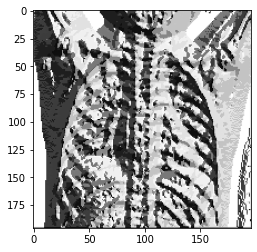

In [ ]:
img = pipeline(amostras[20])
img_lbp = np.zeros((len(img[0]), len(img)), np.uint8)
for i in range(0, len(img[0])):
  for j in range(0, len(img)):
      img_lbp[i, j] = lbp_calculated_pixel(img, i, j)
mostrar_imagemRGB(img_lbp)
print(classe[20])

1


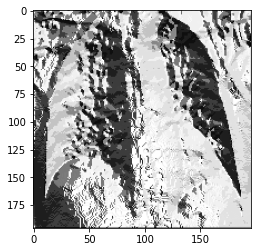

In [ ]:
img = pipeline(amostras[21])
img_lbp = np.zeros((len(img[0]), len(img)), np.uint8)
for i in range(0, len(img[0])):
  for j in range(0, len(img)):
      img_lbp[i, j] = lbp_calculated_pixel(img, i, j)
mostrar_imagemRGB(img_lbp)
print(classe[21])

##Teste 2

In [ ]:
amostras, classe = carrega_data(imagens, img)

def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y-1))
    val_ar.append(get_pixel(img, center, x-1, y))
    val_ar.append(get_pixel(img, center, x-1, y + 1))
    val_ar.append(get_pixel(img, center, x, y + 1))
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
    val_ar.append(get_pixel(img, center, x + 1, y))
    val_ar.append(get_pixel(img, center, x + 1, y-1))
    val_ar.append(get_pixel(img, center, x, y-1))
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val

def pipeline(imagem):
    imagem = cv.resize(imagem, (196, 196))
    imagem = cv.equalizeHist(imagem)
    imagem = cv.GaussianBlur(imagem, (5,5), 0)
    thresh1 = cv.adaptiveThreshold(imagem, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 199, 5)
    thresh2 = cv.adaptiveThreshold(imagem, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 199, 5)
    return imagem
  
def features_extraction(images):
    features_list = []
    for image in images:
        img = pipeline(image)
        img_lbp = np.zeros((len(img[0]), len(img)), np.uint8)
        for i in range(0, len(img[0])):
            for j in range(0, len(img)):
                img_lbp[i, j] = lbp_calculated_pixel(img, i, j)
        img = img_lbp.flatten()
        features_list.append(img.astype(int))
    norm =  MaxAbsScaler()
    norm.fit(features_list)
    norm_features = norm.transform(features_list)
    return norm_features

features = features_extraction(amostras)

X_train, X_test, y_train, y_test = train_test_split(features, classe, train_size=0.3, random_state=42)

pca = PCA(n_components=30)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

parametrosKNN = {
    "n_neighbors": [2, 3, 5, 7, 9, 11, 13, 15],
    "metric": ["euclidean", "manhattam"]
}

func_possiveis = ['tanh', 'logistic']
neur_possiveis =[
                    (10),(20),(30),(40),(50),(60),(70),(80),(90),(100),(200),(300),(400),(500)
                ]
parametrosMLP = {
    "hidden_layer_sizes":  neur_possiveis,
    "activation": func_possiveis
}

knn = GridSearchCV(KNeighborsClassifier(), parametrosKNN)
ini = time.time()
knn.fit(X_train, y_train)
fim = time.time()
result = knn.predict(X_test)
get_confusion_matrix(y_test, result, 'KNN')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia KNN: {knn.score(X=X_test, y=y_test)}")
print(f"Recall KNN: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão KNN: {metrics.precision_score(y_test,result,average=None)}")

mlp = GridSearchCV(MLPClassifier(max_iter=100, early_stopping=True), parametrosMLP)
ini = time.time()
mlp.fit(X_train, y_train)
fim = time.time()
result = mlp.predict(X_test)
get_confusion_matrix(y_test, result, 'MLP')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia MLP: {mlp.score(X=X_test, y=y_test)}")
print(f"Recall MLP: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão MLP: {metrics.precision_score(y_test,result,average=None)}")

svm = SVC(gamma=0.001)
ini = time.time()
svm.fit(X_train, y_train)
fim = time.time()
result = svm.predict(X_test)
get_confusion_matrix(y_test, result, 'SVM')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia SVM: {svm.score(X=X_test, y=y_test)}")
print(f"Recall SVM: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão SVM: {metrics.precision_score(y_test,result,average=None)}")

nb = GaussianNB()
ini = time.time()
nb.fit(X_train, y_train)
fim = time.time()
result = nb.predict(X_test)
get_confusion_matrix(y_test, result, 'NAIVE BAYES')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia NB: {nb.score(X=X_test, y=y_test)}")
print(f"Recall NB: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão NB: {metrics.precision_score(y_test,result,average=None)}")

0


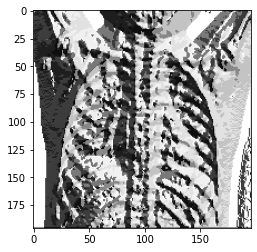

In [ ]:
img = pipeline(amostras[20])
img_lbp = np.zeros((len(img[0]), len(img)), np.uint8)
for i in range(0, len(img[0])):
  for j in range(0, len(img)):
      img_lbp[i, j] = lbp_calculated_pixel(img, i, j)
mostrar_imagemRGB(img_lbp)
print(classe[20])

1


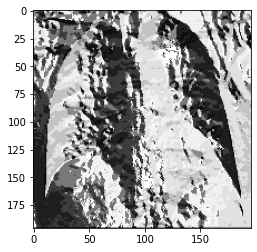

In [ ]:
img = pipeline(amostras[21])
img_lbp = np.zeros((len(img[0]), len(img)), np.uint8)
for i in range(0, len(img[0])):
  for j in range(0, len(img)):
      img_lbp[i, j] = lbp_calculated_pixel(img, i, j)
mostrar_imagemRGB(img_lbp)
print(classe[21])

#Metodologia 3

- Teste 1
1.   Conversão da imagem para tons de cinza
2.   Redimensionamento da imagem para 196 por 196
3.   Aplicação do filtro gausiano
4.   Aplicação do histograma

- Teste 2
1.   Conversão da imagem para tons de cinza
2.   Redimensionamento da imagem para 196 por 196
3.   Aplicação do filtro gausiano
4.   Aplicação do histograma
5.   Extração de caracteristicas com PCA

- Teste 3
1.   Converte a imagem para tons de cinza
2.   Redimensiona a imagem para 196 por 196
3.   Recorta a imagem, objetivando remover o diafragma
4.   Aplicar a equalização de histograma
5.   Aplica o filtro de gaussiano
6.   Aplicando Thershold adaptativo
7.   Aplicação do histograma

- Teste 4
1.   Converte a imagem para tons de cinza
2.   Redimensiona a imagem para 196 por 196
3.   Recorta a imagem, objetivando remover o diafragma
4.   Aplicar a equalização de histograma
5.   Aplica o filtro de gaussiano
6.   Aplicando Thershold adaptativo
7.   Aplicação do histograma
8.   Extração de caracteristicas com PCA

- Algoritmos testados
1.   KNN
2.   MLP
3.   SVM
4.   Naive Bayes

##Teste 1

In [ ]:
amostras, classe = carrega_data(imagens, img)

def pipeline(imagem):
    imagem = cv.resize(imagem, (196, 196))
    imagem = cv.GaussianBlur(imagem, (5,5), 0)
    return imagem
  
def features_extraction(images):
    features_list = []
    for image in images:
        img = pipeline(image)
        img = img.flatten()
        hists = plt.hist(img.ravel(), bins=256)
        features_list.append(hists[0].astype(int))
    norm =  MaxAbsScaler()
    norm.fit(features_list)
    norm_features = norm.transform(features_list)
    return norm_features

features = features_extraction(amostras)

X_train, X_test, y_train, y_test = train_test_split(features, classe, train_size=0.3, random_state=42)

parametrosKNN = {
    "n_neighbors": [2, 3, 5, 7, 9, 11, 13, 15],
    "metric": ["euclidean", "manhattam"]
}

func_possiveis = ['tanh', 'logistic']
neur_possiveis =[
                    (10),(20),(30),(40),(50),(60),(70),(80),(90),(100),(200),(300),(400),(500)
                ]
parametrosMLP = {
    "hidden_layer_sizes":  neur_possiveis,
    "activation": func_possiveis
}

knn = GridSearchCV(KNeighborsClassifier(), parametrosKNN)
ini = time.time()
knn.fit(X_train, y_train)
fim = time.time()
result = knn.predict(X_test)
get_confusion_matrix(y_test, result, 'KNN')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia KNN: {knn.score(X=X_test, y=y_test)}")
print(f"Recall KNN: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão KNN: {metrics.precision_score(y_test,result,average=None)}")

mlp = GridSearchCV(MLPClassifier(max_iter=100, early_stopping=True), parametrosMLP)
ini = time.time()
mlp.fit(X_train, y_train)
fim = time.time()
result = mlp.predict(X_test)
get_confusion_matrix(y_test, result, 'MLP')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia MLP: {mlp.score(X=X_test, y=y_test)}")
print(f"Recall MLP: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão MLP: {metrics.precision_score(y_test,result,average=None)}")

svm = SVC(gamma=0.001)
ini = time.time()
svm.fit(X_train, y_train)
fim = time.time()
result = svm.predict(X_test)
get_confusion_matrix(y_test, result, 'SVM')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia SVM: {svm.score(X=X_test, y=y_test)}")
print(f"Recall SVM: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão SVM: {metrics.precision_score(y_test,result,average=None)}")

nb = GaussianNB()
ini = time.time()
nb.fit(X_train, y_train)
fim = time.time()
result = nb.predict(X_test)
get_confusion_matrix(y_test, result, 'NAIVE BAYES')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia NB: {nb.score(X=X_test, y=y_test)}")
print(f"Recall NB: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão NB: {metrics.precision_score(y_test,result,average=None)}")

In [ ]:
mostrar_imagemRGB(amostras[20])
print(classe[20])

In [ ]:
mostrar_imagemRGB(amostras[21])
print(classe[21])

##Teste 2

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neig

Tempo de treinamento: 0.15276885032653809
Acurácia KNN: 0.8742138364779874
Recall KNN: [0.90163934 0.85714286]
Precisão KNN: [0.79710145 0.93333333]
Tempo de treinamento: 3.2078166007995605
Acurácia MLP: 0.7735849056603774
Recall MLP: [0.81967213 0.74489796]
Precisão MLP: [0.66666667 0.86904762]
Tempo de treinamento: 0.0013623237609863281
Acurácia SVM: 0.6163522012578616
Recall SVM: [0. 1.]
Precisão SVM: [0.        0.6163522]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tempo de treinamento: 0.0010192394256591797
Acurácia NB: 0.7547169811320755
Recall NB: [1.         0.60204082]
Precisão NB: [0.61 1.  ]


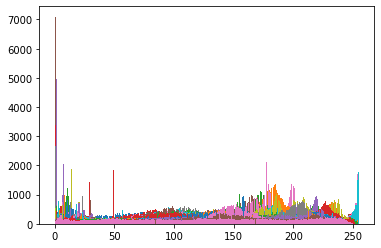

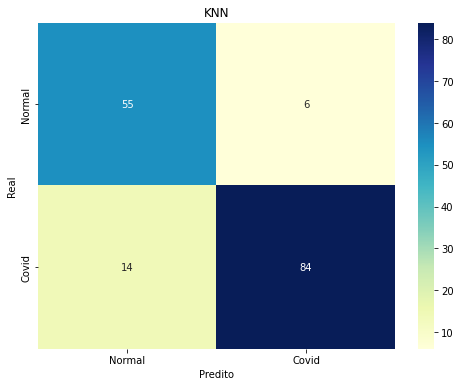

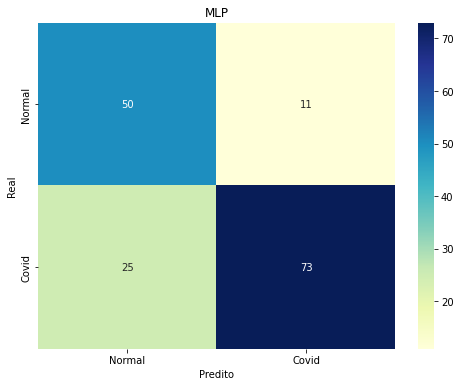

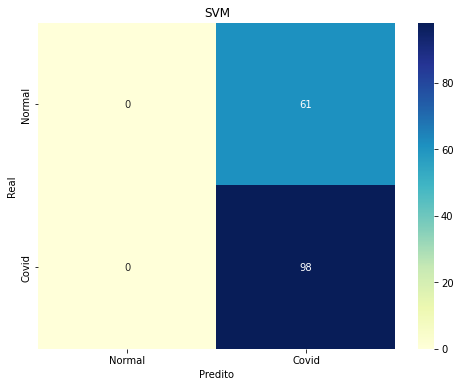

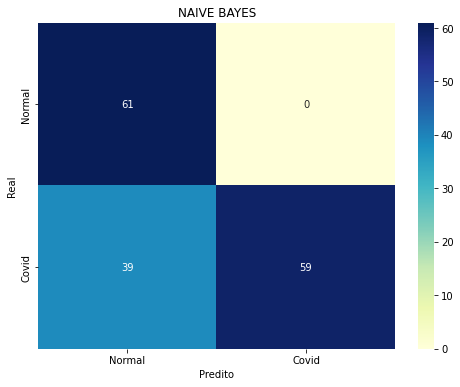

In [ ]:
amostras, classe = carrega_data(imagens, img)

def pipeline(imagem):
    imagem = cv.resize(imagem, (196, 196))
    imagem = cv.GaussianBlur(imagem, (5,5), 0)
    return imagem
  
def features_extraction(images):
    features_list = []
    for image in images:
        img = pipeline(image)
        img = img.flatten()
        hists = plt.hist(img.ravel(), bins=256)
        features_list.append(hists[0].astype(int))
    norm =  MaxAbsScaler()
    norm.fit(features_list)
    norm_features = norm.transform(features_list)
    return norm_features

features = features_extraction(amostras)

X_train, X_test, y_train, y_test = train_test_split(features, classe, train_size=0.3, random_state=42)

pca = PCA(n_components=30)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

parametrosKNN = {
    "n_neighbors": [2, 3, 5, 7, 9, 11, 13, 15],
    "metric": ["euclidean", "manhattam"]
}

func_possiveis = ['tanh', 'logistic']
neur_possiveis =[
                    (10),(20),(30),(40),(50),(60),(70),(80),(90),(100),(200),(300),(400),(500)
                ]
parametrosMLP = {
    "hidden_layer_sizes":  neur_possiveis,
    "activation": func_possiveis
}

knn = GridSearchCV(KNeighborsClassifier(), parametrosKNN)
ini = time.time()
knn.fit(X_train, y_train)
fim = time.time()
result = knn.predict(X_test)
get_confusion_matrix(y_test, result, 'KNN')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia KNN: {knn.score(X=X_test, y=y_test)}")
print(f"Recall KNN: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão KNN: {metrics.precision_score(y_test,result,average=None)}")

mlp = GridSearchCV(MLPClassifier(max_iter=100, early_stopping=True), parametrosMLP)
ini = time.time()
mlp.fit(X_train, y_train)
fim = time.time()
result = mlp.predict(X_test)
get_confusion_matrix(y_test, result, 'MLP')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia MLP: {mlp.score(X=X_test, y=y_test)}")
print(f"Recall MLP: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão MLP: {metrics.precision_score(y_test,result,average=None)}")

svm = SVC(gamma=0.001)
ini = time.time()
svm.fit(X_train, y_train)
fim = time.time()
result = svm.predict(X_test)
get_confusion_matrix(y_test, result, 'SVM')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia SVM: {svm.score(X=X_test, y=y_test)}")
print(f"Recall SVM: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão SVM: {metrics.precision_score(y_test,result,average=None)}")

nb = GaussianNB()
ini = time.time()
nb.fit(X_train, y_train)
fim = time.time()
result = nb.predict(X_test)
get_confusion_matrix(y_test, result, 'NAIVE BAYES')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia NB: {nb.score(X=X_test, y=y_test)}")
print(f"Recall NB: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão NB: {metrics.precision_score(y_test,result,average=None)}")

In [ ]:
mostrar_imagemRGB(amostras[20])
print(classe[20])

In [ ]:
mostrar_imagemRGB(amostras[21])
print(classe[21])

##Teste 3

In [ ]:
amostras, classe = carrega_data(imagens, img)

def pipeline(imagem):
    imagem = cv.resize(imagem, (196, 196))
    imagem = imagem[0:170, :]
    imagem = cv.equalizeHist(imagem)
    imagem = cv.GaussianBlur(imagem, (5,5), 0)
    thresh1 = cv.adaptiveThreshold(imagem, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 199, 5)
    thresh2 = cv.adaptiveThreshold(imagem, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 199, 5)
    return imagem
  
def features_extraction(images):
    features_list = []
    for image in images:
        img = pipeline(image)
        img = img.flatten()
        hists = plt.hist(img.ravel(), bins=256)
        features_list.append(hists[0].astype(int))
    norm =  MaxAbsScaler()
    norm.fit(features_list)
    norm_features = norm.transform(features_list)
    return norm_features

features = features_extraction(amostras)

X_train, X_test, y_train, y_test = train_test_split(features, classe, train_size=0.3, random_state=42)

parametrosKNN = {
    "n_neighbors": [2, 3, 5, 7, 9, 11, 13, 15],
    "metric": ["euclidean", "manhattam"]
}

func_possiveis = ['tanh', 'logistic']
neur_possiveis =[
                    (10),(20),(30),(40),(50),(60),(70),(80),(90),(100),(200),(300),(400),(500)
                ]
parametrosMLP = {
    "hidden_layer_sizes":  neur_possiveis,
    "activation": func_possiveis
}

knn = GridSearchCV(KNeighborsClassifier(), parametrosKNN)
ini = time.time()
knn.fit(X_train, y_train)
fim = time.time()
result = knn.predict(X_test)
get_confusion_matrix(y_test, result, 'KNN')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia KNN: {knn.score(X=X_test, y=y_test)}")
print(f"Recall KNN: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão KNN: {metrics.precision_score(y_test,result,average=None)}")

mlp = GridSearchCV(MLPClassifier(max_iter=100, early_stopping=True), parametrosMLP)
ini = time.time()
mlp.fit(X_train, y_train)
fim = time.time()
result = mlp.predict(X_test)
get_confusion_matrix(y_test, result, 'MLP')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia MLP: {mlp.score(X=X_test, y=y_test)}")
print(f"Recall MLP: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão MLP: {metrics.precision_score(y_test,result,average=None)}")

svm = SVC(gamma=0.001)
ini = time.time()
svm.fit(X_train, y_train)
fim = time.time()
result = svm.predict(X_test)
get_confusion_matrix(y_test, result, 'SVM')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia SVM: {svm.score(X=X_test, y=y_test)}")
print(f"Recall SVM: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão SVM: {metrics.precision_score(y_test,result,average=None)}")

nb = GaussianNB()
ini = time.time()
nb.fit(X_train, y_train)
fim = time.time()
result = nb.predict(X_test)
get_confusion_matrix(y_test, result, 'NAIVE BAYES')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia NB: {nb.score(X=X_test, y=y_test)}")
print(f"Recall NB: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão NB: {metrics.precision_score(y_test,result,average=None)}")

In [ ]:
mostrar_imagemRGB(amostras[20])
print(classe[20])

In [ ]:
mostrar_imagemRGB(amostras[21])
print(classe[21])

##Teste 4

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neig

Tempo de treinamento: 0.15442728996276855
Acurácia KNN: 0.8553459119496856
Recall KNN: [0.83606557 0.86734694]
Precisão KNN: [0.796875   0.89473684]
Tempo de treinamento: 3.198387861251831
Acurácia MLP: 0.8050314465408805
Recall MLP: [0.55737705 0.95918367]
Precisão MLP: [0.89473684 0.7768595 ]
Tempo de treinamento: 0.0024781227111816406
Acurácia SVM: 0.6163522012578616
Recall SVM: [0. 1.]
Precisão SVM: [0.        0.6163522]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tempo de treinamento: 0.0026307106018066406
Acurácia NB: 0.8742138364779874
Recall NB: [0.85245902 0.8877551 ]
Precisão NB: [0.82539683 0.90625   ]


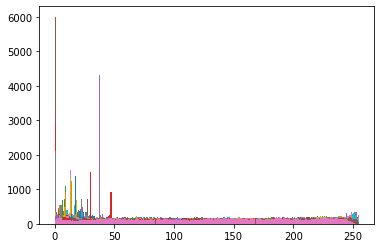

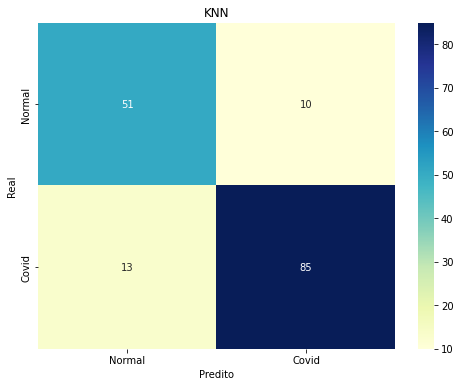

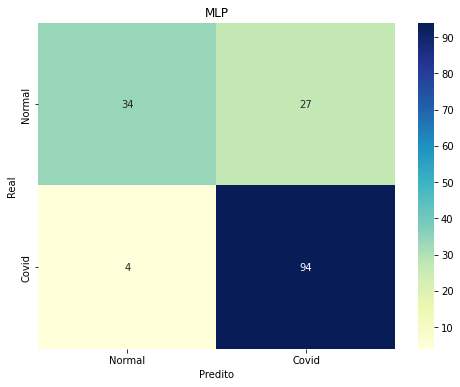

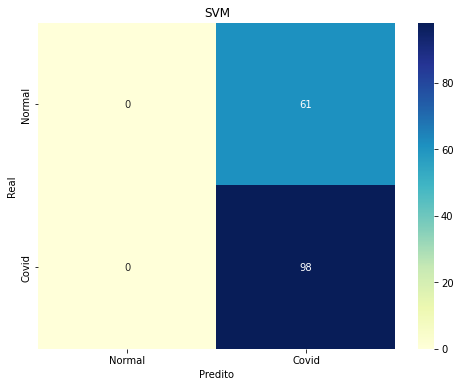

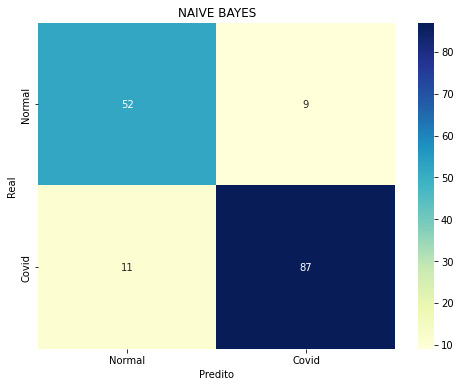

In [ ]:
amostras, classe = carrega_data(imagens, img)

def pipeline(imagem):
    imagem = cv.resize(imagem, (196, 196))
    imagem = imagem[0:170, :]
    imagem = cv.equalizeHist(imagem)
    imagem = cv.GaussianBlur(imagem, (5,5), 0)
    thresh1 = cv.adaptiveThreshold(imagem, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 199, 5)
    thresh2 = cv.adaptiveThreshold(imagem, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 199, 5)
    return imagem
  
def features_extraction(images):
    features_list = []
    for image in images:
        img = pipeline(image)
        img = img.flatten()
        hists = plt.hist(img.ravel(), bins=256)
        features_list.append(hists[0].astype(int))
    norm =  MaxAbsScaler()
    norm.fit(features_list)
    norm_features = norm.transform(features_list)
    return norm_features

features = features_extraction(amostras)

X_train, X_test, y_train, y_test = train_test_split(features, classe, train_size=0.3, random_state=42)

pca = PCA(n_components=30)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

parametrosKNN = {
    "n_neighbors": [2, 3, 5, 7, 9, 11, 13, 15],
    "metric": ["euclidean", "manhattam"]
}

func_possiveis = ['tanh', 'logistic']
neur_possiveis =[
                    (10),(20),(30),(40),(50),(60),(70),(80),(90),(100),(200),(300),(400),(500)
                ]
parametrosMLP = {
    "hidden_layer_sizes":  neur_possiveis,
    "activation": func_possiveis
}

knn = GridSearchCV(KNeighborsClassifier(), parametrosKNN)
ini = time.time()
knn.fit(X_train, y_train)
fim = time.time()
result = knn.predict(X_test)
get_confusion_matrix(y_test, result, 'KNN')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia KNN: {knn.score(X=X_test, y=y_test)}")
print(f"Recall KNN: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão KNN: {metrics.precision_score(y_test,result,average=None)}")

mlp = GridSearchCV(MLPClassifier(max_iter=100, early_stopping=True), parametrosMLP)
ini = time.time()
mlp.fit(X_train, y_train)
fim = time.time()
result = mlp.predict(X_test)
get_confusion_matrix(y_test, result, 'MLP')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia MLP: {mlp.score(X=X_test, y=y_test)}")
print(f"Recall MLP: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão MLP: {metrics.precision_score(y_test,result,average=None)}")

svm = SVC(gamma=0.001)
ini = time.time()
svm.fit(X_train, y_train)
fim = time.time()
result = svm.predict(X_test)
get_confusion_matrix(y_test, result, 'SVM')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia SVM: {svm.score(X=X_test, y=y_test)}")
print(f"Recall SVM: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão SVM: {metrics.precision_score(y_test,result,average=None)}")

nb = GaussianNB()
ini = time.time()
nb.fit(X_train, y_train)
fim = time.time()
result = nb.predict(X_test)
get_confusion_matrix(y_test, result, 'NAIVE BAYES')
print(f"Tempo de treinamento: {fim - ini}")
print(f"Acurácia NB: {nb.score(X=X_test, y=y_test)}")
print(f"Recall NB: {metrics.recall_score(y_test,result,average=None)}")
print(f"Precisão NB: {metrics.precision_score(y_test,result,average=None)}")

In [ ]:
mostrar_imagemRGB(amostras[20])
print(classe[20])

In [ ]:
mostrar_imagemRGB(amostras[21])
print(classe[21])